# GMU ECE 527 - Computer Exercise #8 Part 1 - Code
**Stewart Schuler - G01395779**\
**20241205**

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Input as Input
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
#import numpy as np
#from keras.utils import np_utils
import matplotlib
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
img_x, img_y = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1 )
x_test  = x_test.reshape( x_test.shape[0],  img_x, img_y, 1 )

x_train = x_train.astype('float32')
x_test  = x_test.astype( 'float32')
x_train /= 255.0
x_test  /= 255.0

print(y_train.shape)
print(y_train[0])
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test,  num_classes)
print(y_train.shape)
print(y_train[0])

(60000,)
5
(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [4]:
model = Sequential()
model.add(Flatten())
model.add(keras.Input(shape=(28,28,)))
model.add(Dense(32,))
model.add(Dense(10))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ input_layer (InputLayer)             │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
model = Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam', metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1000)                │       1,025,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,087,106 (4.15 MB)

 Trainable params: 1,087,106 (4.15 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
hist = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test), callbacks=None)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8928 - loss: 0.3524 - val_accuracy: 0.9871 - val_loss: 0.0438
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9869 - loss: 0.0425 - val_accuracy: 0.9853 - val_loss: 0.0463
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9907 - loss: 0.0287 - val_accuracy: 0.9895 - val_loss: 0.0300
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9939 - loss: 0.0182 - val_accuracy: 0.9920 - val_loss: 0.0228
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9945 - loss: 0.0163 - val_accuracy: 0.9902 - val_loss: 0.0272
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9963 - loss: 0.0106 - val_accuracy: 0.9927 - val_loss: 0.0245
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9975 - loss: 0.0078 - val_accuracy: 0.9899 - val_loss: 0.0305
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9971 - loss: 0.0097 - val_accu

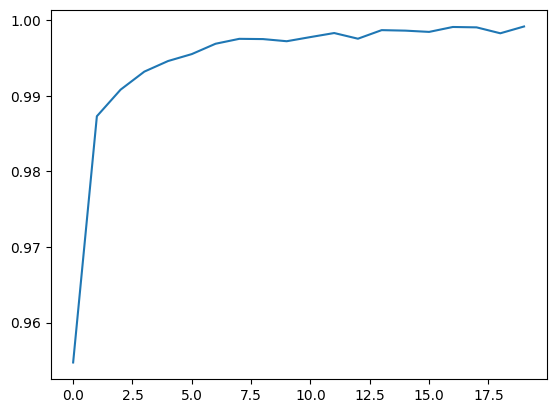

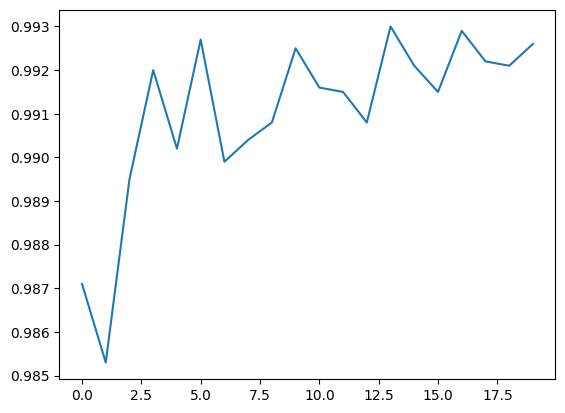

In [7]:
plt.figure()
plt.plot( hist.history['accuracy'])
plt.figure()
plt.plot( hist.history['val_accuracy'])


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7171 - loss: 1.0595 - val_accuracy: 0.8990 - val_loss: 0.3876
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8971 - loss: 0.3845 - val_accuracy: 0.9131 - val_loss: 0.3213
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9106 - loss: 0.3261 - val_accuracy: 0.9182 - val_loss: 0.2965
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9150 - loss: 0.3065 - val_accuracy: 0.9203 - val_loss: 0.2864
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9214 - loss: 0.2870 - val_accuracy: 0.9236 - val_loss: 0.2787
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9201 - loss: 0.2871 - val_accuracy: 0.9234 - val_loss: 0.2742
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9234 - loss: 0.2725 - val_accuracy: 0.9244 - val_loss: 0.2702
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9258 - loss: 0.2664 - val_accuracy: 0.

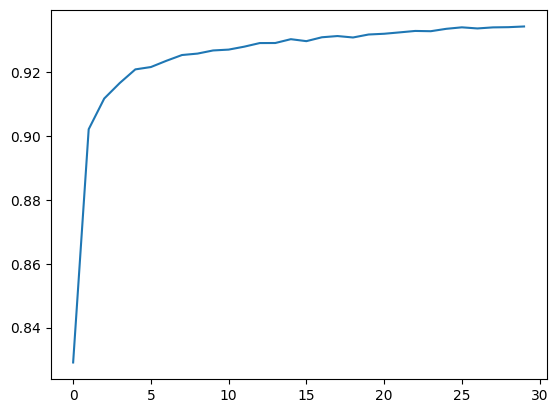

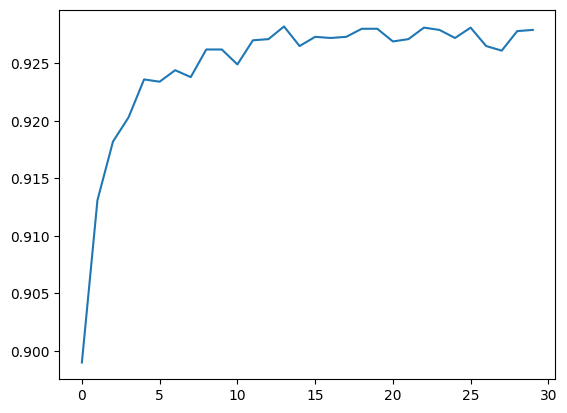

In [8]:
model_lr = Sequential()
model_lr.add(Input((28,28,1)))
model_lr.add(Flatten())
model_lr.add(Dense(10,activation='softmax'))
model_lr.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam', metrics=['accuracy'])

model_lr.summary()
hist = model_lr.fit(x_train, y_train, batch_size=128, epochs=30, verbose=1, validation_data=(x_test, y_test), callbacks=None)
plt.figure()
plt.plot( hist.history['accuracy'])
plt.figure()
plt.plot( hist.history['val_accuracy'])


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 28)                  │          21,980 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 10)                  │             290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,270 (86.99 KB)

 Trainable params: 22,270 (86.99 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7572 - loss: 0.8665 - val_accuracy: 0.9217 - val_loss: 0.2839
Epoch 2/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9217 - loss: 0.2809 - val_accuracy: 0.9351 - val_loss: 0.2395
Epoch 3/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9353 - loss: 0.2332 - val_accuracy: 0.9390 - val_loss: 0.2118
Epoch 4/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9433 - loss: 0.2007 - val_accuracy: 0.9467 - val_loss: 0.1877
Epoch 5/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9506 - loss: 0.1739 - val_accuracy: 0.9518 - val_loss: 0.1700
Epoch 6/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9567 - loss: 0.1522 - val_accuracy: 0.9533 - val_loss: 0.1597
Epoch 7/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9593 - loss: 0.1421 - val_accuracy: 0.9573 - val_loss: 0.1476
Epoch 8/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9609 - loss: 0.1326 - val_accuracy: 0.

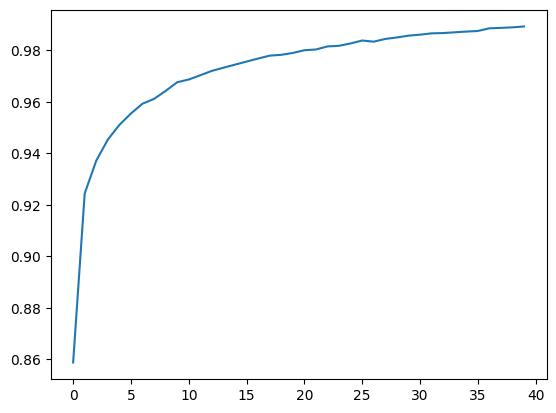

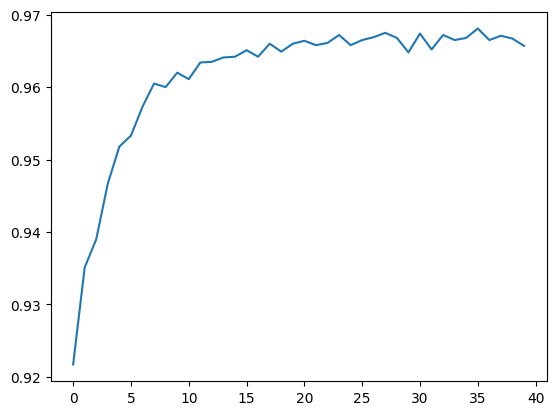

In [17]:
model_1h = Sequential()
model_1h.add(Input((28,28,1)))
model_1h.add(Flatten())
model_1h.add(Dense(28,activation='relu'))
model_1h.add(Dense(10,activation='softmax'))
model_1h.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam', metrics=['accuracy'])

model_1h.summary()
hist = model_1h.fit(x_train, y_train, batch_size=128, epochs=40, verbose=1, validation_data=(x_test, y_test), callbacks=None)
plt.figure()
plt.plot( hist.history['accuracy'])
plt.figure()
plt.plot( hist.history['val_accuracy'])


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 26)                  │          20,410 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 20)                  │             540 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,160 (82.66 KB)

 Trainable params: 21,160 (82.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6966 - loss: 1.0046 - val_accuracy: 0.9250 - val_loss: 0.2587
Epoch 2/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9292 - loss: 0.2483 - val_accuracy: 0.9373 - val_loss: 0.2126
Epoch 3/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9416 - loss: 0.2009 - val_accuracy: 0.9447 - val_loss: 0.1918
Epoch 4/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9474 - loss: 0.1787 - val_accuracy: 0.9505 - val_loss: 0.1668
Epoch 5/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9566 - loss: 0.1520 - val_accuracy: 0.9515 - val_loss: 0.1632
Epoch 6/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9604 - loss: 0.1387 - val_accuracy: 0.9549 - val_loss: 0.1507
Epoch 7/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9631 - loss: 0.1294 - val_accuracy: 0.9568 - val_loss: 0.1456
Epoch 8/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9653 - loss: 0.1182 - val_accuracy: 0.

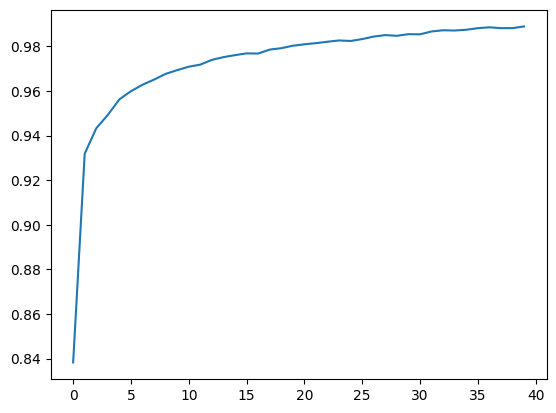

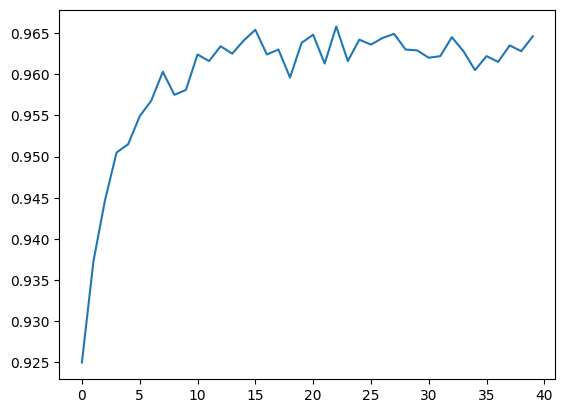

In [10]:
model_2h = Sequential()
model_2h.add(Input((28,28,1)))
model_2h.add(Flatten())
model_2h.add(Dense(26,activation='relu'))
model_2h.add(Dense(20,activation='relu'))
model_2h.add(Dense(10,activation='softmax'))
model_2h.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam', metrics=['accuracy'])

model_2h.summary()
hist = model_2h.fit(x_train, y_train, batch_size=128, epochs=40, verbose=1, validation_data=(x_test, y_test), callbacks=None)
plt.figure()
plt.plot( hist.history['accuracy'])
plt.figure()
plt.plot( hist.history['val_accuracy'])


In [11]:
model_h10 = Sequential()
model_h10.add(Input(shape=(28,28,)))
model_h10.add(Flatten())
model_h10.add(Dense(10, activation='relu'))
model_h10.add(Dense(10, activation='relu'))
model_h10.add(Dense(10, activation='relu'))
model_h10.add(Dense(10, activation='relu'))
model_h10.add(Dense(10, activation='relu'))
model_h10.add(Dense(10, activation='relu'))
model_h10.add(Dense(10, activation='relu'))
model_h10.add(Dense(10, activation='relu'))
model_h10.add(Dense(10, activation='relu'))
model_h10.add(Dense(10, activation='relu'))
model_h10.add(Dense(10, activation='softmax'))

model_h10.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam', metrics=['accuracy'])

model_h10.summary()
hist = model_h10.fit(x_train, y_train, batch_size=128, epochs=40, verbose=1, validation_data=(x_test, y_test), callbacks=None)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,950 (34.96 KB)

 Trainable params: 8,950 (34.96 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3238 - loss: 1.8134 - val_accuracy: 0.7471 - val_loss: 0.7951
Epoch 2/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7820 - loss: 0.7090 - val_accuracy: 0.8420 - val_loss: 0.5744
Epoch 3/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8419 - loss: 0.5501 - val_accuracy: 0.8568 - val_loss: 0.5188
Epoch 4/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8604 - loss: 0.4933 - val_accuracy: 0.8701 - val_loss: 0.4740
Epoch 5/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8728 - loss: 0.4518 - val_accuracy: 0.8767 - val_loss: 0.4500
Epoch 6/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8836 - loss: 0.4250 - val_accuracy: 0.8846 - val_loss: 0.4158
Epoch 7/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8877 - loss: 0.4030 - val_accuracy: 0.8944 - val_loss: 0.3915
Epoch 8/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8975 - loss: 0.3715 - val_accuracy: 0.

In [12]:
model_h32 = Sequential()
model_h32.add(Input(shape=(28,28,)))
model_h32.add(Flatten())
model_h32.add(Dense(32, activation='relu'))
model_h32.add(Dense(32, activation='relu'))
model_h32.add(Dense(32, activation='relu'))
model_h32.add(Dense(32, activation='relu'))
model_h32.add(Dense(32, activation='relu'))
model_h32.add(Dense(32, activation='relu'))
model_h32.add(Dense(32, activation='relu'))
model_h32.add(Dense(32, activation='relu'))
model_h32.add(Dense(32, activation='relu'))
model_h32.add(Dense(32, activation='relu'))
model_h32.add(Dense(10, activation='softmax'))

model_h32.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam', metrics=['accuracy'])

model_h32.summary()
hist = model_h32.fit(x_train, y_train, batch_size=128, epochs=40, verbose=1, validation_data=(x_test, y_test), callbacks=None)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,954 (136.54 KB)

 Trainable params: 34,954 (136.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5457 - loss: 1.2438 - val_accuracy: 0.9219 - val_loss: 0.2749
Epoch 2/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9286 - loss: 0.2497 - val_accuracy: 0.9399 - val_loss: 0.2151
Epoch 3/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9461 - loss: 0.1848 - val_accuracy: 0.9334 - val_loss: 0.2241
Epoch 4/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9545 - loss: 0.1538 - val_accuracy: 0.9539 - val_loss: 0.1584
Epoch 5/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9610 - loss: 0.1335 - val_accuracy: 0.9553 - val_loss: 0.1556
Epoch 6/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9643 - loss: 0.1179 - val_accuracy: 0.9537 - val_loss: 0.1608
Epoch 7/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9679 - loss: 0.1100 - val_accuracy: 0.9592 - val_loss: 0.1408
Epoch 8/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9718 - loss: 0.0987 - val_accuracy: 0.

In [22]:
model = Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(5, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(5, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam', metrics=['accuracy'])

model.summary()
hist = model.fit(x_train, y_train, batch_size=128, epochs=40, verbose=1, validation_data=(x_test, y_test), callbacks=None)

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 24, 24, 5)           │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 12, 12, 5)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 10, 10, 5)           │             230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 5, 5, 5)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 125)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 20)                  │           2,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,090 (12.07 KB)

 Trainable params: 3,090 (12.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5846 - loss: 1.2666 - val_accuracy: 0.9374 - val_loss: 0.2114
Epoch 2/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9418 - loss: 0.1971 - val_accuracy: 0.9593 - val_loss: 0.1346
Epoch 3/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9575 - loss: 0.1454 - val_accuracy: 0.9681 - val_loss: 0.1038
Epoch 4/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9652 - loss: 0.1133 - val_accuracy: 0.9711 - val_loss: 0.0919
Epoch 5/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9695 - loss: 0.1025 - val_accuracy: 0.9727 - val_loss: 0.0889
Epoch 6/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9741 - loss: 0.0882 - val_accuracy: 0.9776 - val_loss: 0.0706
Epoch 7/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9752 - loss: 0.0828 - val_accuracy: 0.9749 - val_loss: 0.0746
Epoch 8/40
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9763 - loss: 0.0776 - val_accuracy: 0.